<a href="https://colab.research.google.com/github/ZaplatinArtur/titanic_replace/blob/main/titanic_replace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
df  =pd.read_csv('Titanic (2).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Аналитика

**Pclass** — класс пассажира (1 — высший, 2 — средний, 3 — низший);<br>
**Name** — имя; <br>
**Sex** — пол; <br>
**Age** — возраст; <br>
**SibSp** — количество братьев, сестёр, сводных братьев, сводных сестёр, супругов на борту «Титаника»; <br>
**Parch** — количество родителей, детей (в том числе приёмных) на борту «Титаника»; <br>
**Ticket** — номер билета; <br>
**Fare** — плата за проезд;<br>
**Cabin** — каюта; <br>
**Embarked** — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон)<br>


**Поработаем с пропусками**

In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


колонку Cabin можно полностью удалить т.к в ней слишком много пропусков.В колонке Embarked можно удалить только пропусщенные строки,а колоку Age заполним средними значениями

In [5]:
df = df.drop("Cabin",axis = 1)
df["Age"] = df["Age"].fillna(df["Age"].mean())
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Графики**

In [7]:
import matplotlib.pyplot as plt


посмотрим распределение лбдей между выжившими и погибшими

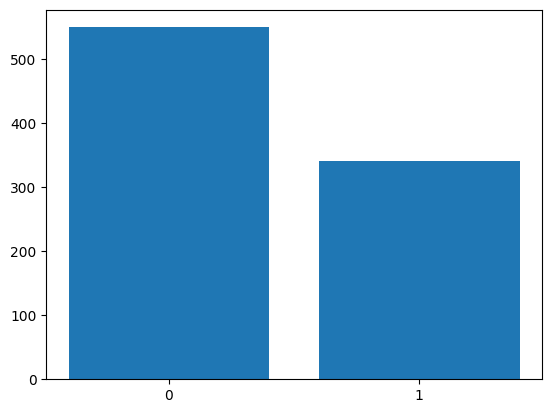

In [8]:
plt.bar(["0","1"],df.groupby("Survived").count()["PassengerId"]);

Видим ,что распределение смещено в сторону погибших

рассмотрим распределение выживших между полами

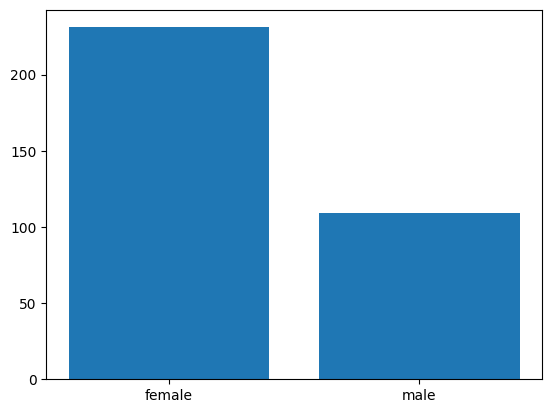

In [9]:
df_survived = df[df["Survived"]==1]

plt.bar(df_survived["Sex"].unique(),df_survived.groupby("Sex").count()["Survived"]);

как видим больше выжило женщин

Теперь рассмотрим тоже самое ,но не в абсолютном значении ,а в доле от представителей этого пола на корабле

In [10]:
df_survived = df[df["Survived"]==1]
df_not_survived = df[df["Survived"]==0]
df_not_survived["Survived"] = 1

<ipython-input-10-11f204bcd690>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_survived["Survived"] = 1


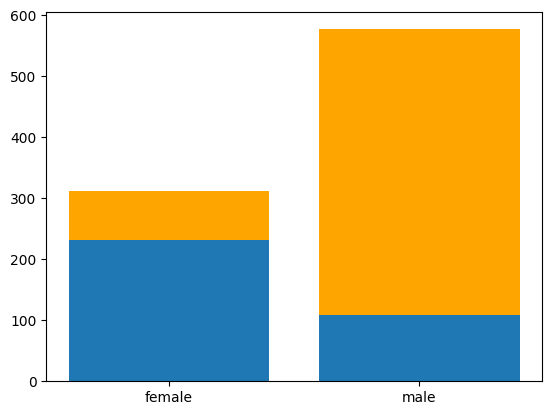

In [11]:
plt.bar(df_survived["Sex"].unique(),df_survived.groupby("Sex").count()["Survived"])
plt.bar(df_survived["Sex"].unique(),df_not_survived.groupby("Sex").count()["Survived"],color = "orange",bottom =df_survived.groupby("Sex").count()["Survived"] )
plt.show()

Как видим боля выживших среди женщин намного выше

Рассмотрим распределение выживших  относительно классов

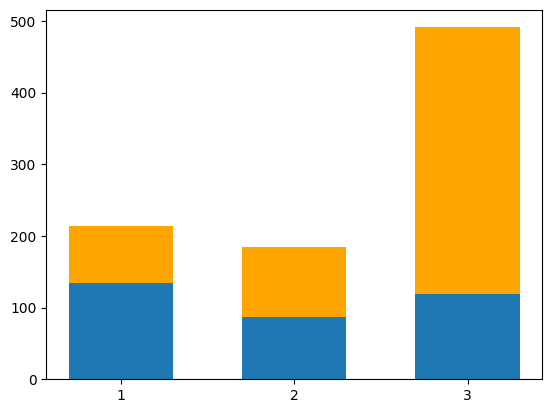

In [12]:
plt.bar(["1","2","3"],df_survived.groupby("Pclass").count()["Survived"],width=0.6)
plt.bar(["1","2","3"],df_not_survived.groupby("Pclass").count()["Survived"],color = "orange",bottom =df_survived.groupby("Pclass").count()["Survived"],width=0.6 )
plt.show()

как види выживаемость была больше в первом классе,а меньше всего в третьем

Посмотрим теперь на выживаемость среди женщин по классу

In [13]:
df_survived_fem = df[(df["Survived"]==1) & (df["Sex"]== "female") ]
df_not_survived_fem = df[(df["Survived"]==0) &(df["Sex"] == "female")]
df_not_survived_fem["Survived"] = 1

<ipython-input-13-6979f6d36870>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_survived_fem["Survived"] = 1


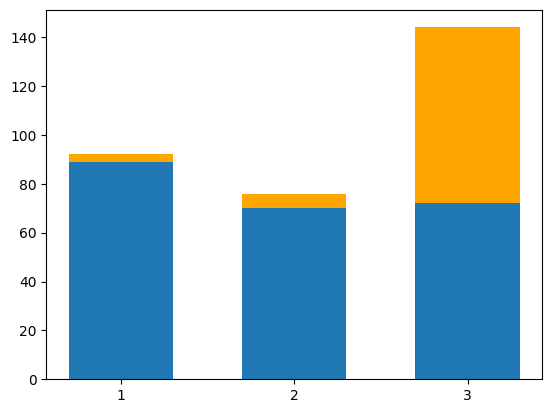

In [14]:
plt.bar(["1","2","3"],df_survived_fem.groupby("Pclass").count()["Survived"],width=0.6)
plt.bar(["1","2","3"],df_not_survived_fem.groupby("Pclass").count()["Survived"],color = "orange",bottom =df_survived_fem.groupby("Pclass").count()["Survived"],width=0.6 )
plt.show()

Как видим если ты женщина из первого  или второго класса,то ты скорее всего выживешь

Теперь также рассмотрим мужчин

In [15]:
df_survived_male = df[(df["Survived"]==1) & (df["Sex"]== "male") ]
df_not_survived_male = df[(df["Survived"]==0) &(df["Sex"] == "male")]
df_not_survived_male["Survived"] = 1

<ipython-input-15-7bae86999f32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_survived_male["Survived"] = 1


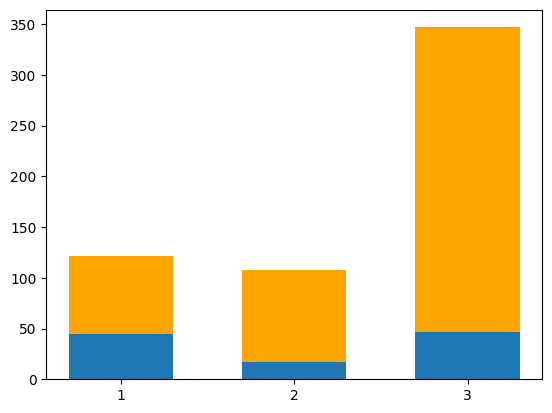

In [16]:
plt.bar(["1","2","3"],df_survived_male.groupby("Pclass").count()["Survived"],width=0.6)
plt.bar(["1","2","3"],df_not_survived_male.groupby("Pclass").count()["Survived"],color = "orange",bottom =df_survived_male.groupby("Pclass").count()["Survived"],width=0.6 )
plt.show()

у мужчин также выживаемость растет от низшего класса к высшиму,хотя и не так выражено

Рассмотрим выживаемость относительно порта посадки

In [17]:
df_survived = df[df["Survived"]==1]
df_not_survived = df[df["Survived"]==0]
df_not_survived["Survived"] = 1

<ipython-input-17-11f204bcd690>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_survived["Survived"] = 1


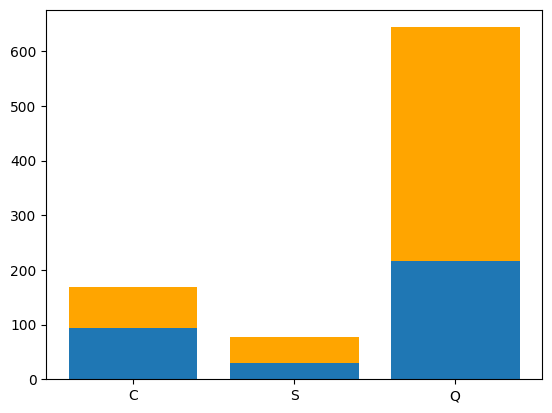

In [18]:
plt.bar(df_survived["Embarked"].unique(),df_survived.groupby("Embarked").count()["Survived"])
plt.bar(df_survived["Embarked"].unique(),df_not_survived.groupby("Embarked").count()["Survived"],color = "orange",bottom =df_survived.groupby("Embarked").count()["Survived"] )
plt.show()

Как видим особой корреляции нет

Рассмотрим оба пола

**Женщины**

In [19]:
df_survived_fem = df[(df["Survived"]==1) & (df["Sex"]== "female") ]
df_not_survived_fem = df[(df["Survived"]==0) &(df["Sex"] == "female")]
df_not_survived_fem["Survived"] = 1

<ipython-input-19-6979f6d36870>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_survived_fem["Survived"] = 1


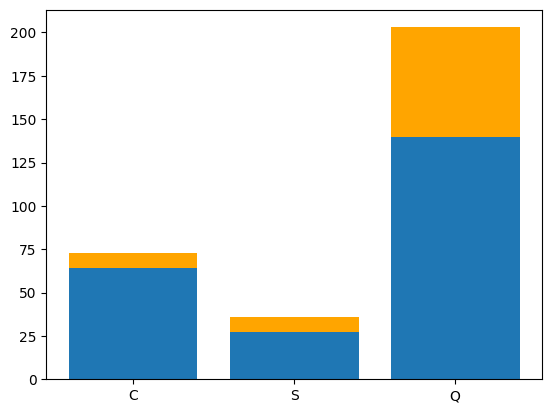

In [20]:
plt.bar(df_survived_fem["Embarked"].unique(),df_survived_fem.groupby("Embarked").count()["Survived"])
plt.bar(df_survived["Embarked"].unique(),df_not_survived_fem.groupby("Embarked").count()["Survived"],color = "orange",bottom =df_survived_fem.groupby("Embarked").count()["Survived"] )
plt.show()

**Мужчины**

In [21]:
df_survived_male = df[(df["Survived"]==1) & (df["Sex"]== "male") ]
df_not_survived_male = df[(df["Survived"]==0) &(df["Sex"] == "male")]
df_not_survived_male["Survived"] = 1

<ipython-input-21-7bae86999f32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_survived_male["Survived"] = 1


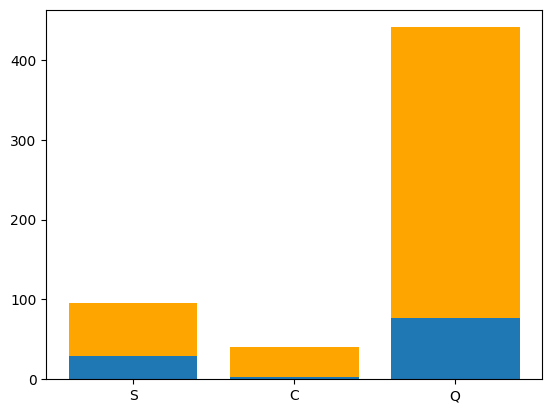

In [22]:
plt.bar(df_survived_male["Embarked"].unique(),df_survived_male.groupby("Embarked").count()["Survived"])
plt.bar(df_survived_male["Embarked"].unique(),df_not_survived_male.groupby("Embarked").count()["Survived"],color = "orange",bottom =df_survived_male.groupby("Embarked").count()["Survived"] )
plt.show()

как видим скорее всего на выживаемость порт практически не влияет

Рассмотрим выживаемость взависимости от возраста

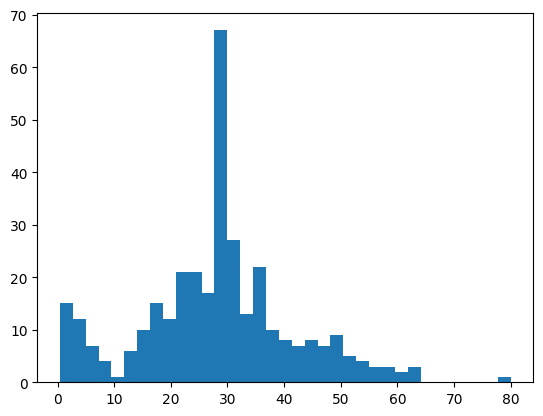

In [23]:
df_survived = df[df["Survived"]==1]
plt.hist(df_survived["Age"],bins =35);

как видим чаще всего выживали люди от 0 до 10 и от 20 до ~35

# Работа с выбросами

т.к данных и так мало я не считаю нужным удалять что-то

# Создание признаков

введем новый признак Family_size равнй SibSp + Parch и рассмотрим выживаемость

In [24]:
df["Family_size"] = df["Parch"]+df["SibSp"]
df_survived_family = df[(df["Survived"]==1)  ]
df_not_survived_family = df[(df["Survived"]==0)]
df_not_survived_family["Survived"] = 1

<ipython-input-24-3d00cb9cfb73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_survived_family["Survived"] = 1


выжили

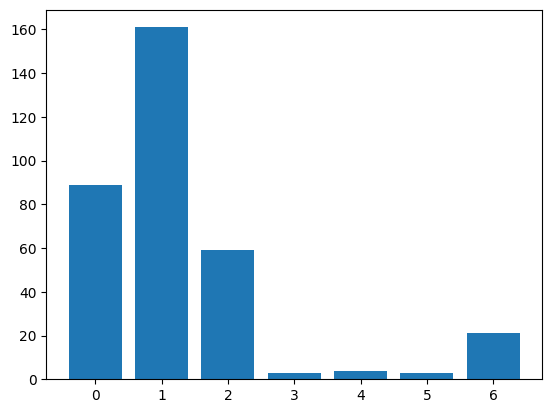

In [25]:
plt.bar(df_survived_family["Family_size"].unique(),df_survived_family.groupby("Family_size").count()["Survived"])

plt.show()

умерли

<BarContainer object of 9 artists>

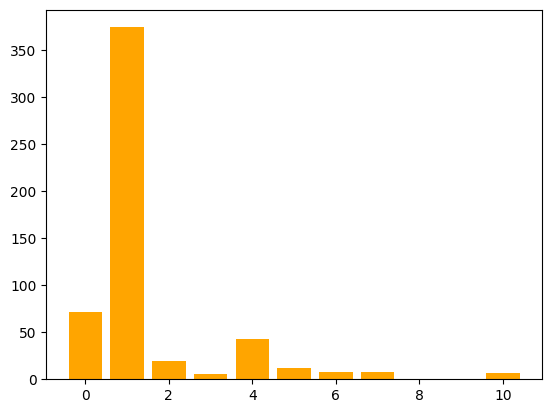

In [26]:
plt.bar(df_not_survived_family["Family_size"].unique(),df_not_survived_family.groupby("Family_size").count()["Survived"],color = "orange" )

Как видим среди тех кто был с одним членом семьи большая смертность,скорее всего муж отдавал место жене,а также среди больших семей

**Удаление признаков**

Т.к Family_size включает в себя Parch и SibSp мы можем удалить две эти колонки

In [27]:
df = df.drop(["Parch","SibSp"],axis = 1)

также можем удалить колонки PassengerId,Name,Ticket т.к они не несут в себе смысла

In [28]:
df = df.drop(["Ticket","PassengerId","Name"],axis = 1)

# Обучение модели

преобразуем категориальные признаки

In [29]:
from sklearn.preprocessing import LabelEncoder
categorial_col = df.select_dtypes(include=['object']).columns
for col in categorial_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,1,22.000000,7.2500,2,1
1,1,1,0,38.000000,71.2833,0,1
2,1,3,0,26.000000,7.9250,2,0
3,1,1,0,35.000000,53.1000,2,1
4,0,3,1,35.000000,8.0500,2,0
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,2,0
887,1,1,0,19.000000,30.0000,2,0
888,0,3,0,29.699118,23.4500,2,3
889,1,1,1,26.000000,30.0000,0,0


Делим датасет на обучающую и тестовую выборки

In [30]:
from sklearn.model_selection import train_test_split


X = df.drop("Survived",axis =1)
Y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

Нормализируем данные

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Линейная классификация**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
accuracy =accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.90%


попробуем полиномиальные признаки

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
#spotify["oth"]  = spotify["popularity"]/spotify["duration_ms"]

X = df.drop("Survived",axis =1)
Y = df["Survived"]
X  =poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
accuracy =accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.46%


**Лес классификации**

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
lg = RandomForestClassifier()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
accuracy =accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.53%


вернемся к обычным значениям на выбороках

In [36]:
from sklearn.model_selection import train_test_split


X = df.drop("Survived",axis =1)
Y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Нейронные сети**

самая простая сеть

In [37]:
pip install keras

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7505 - loss: 0.6111 - val_accuracy: 0.8112 - val_loss: 0.4955
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8214 - loss: 0.4244 - val_accuracy: 0.7762 - val_loss: 0.4920
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7916 - loss: 0.4216 - val_accuracy: 0.7832 - val_loss: 0.4674
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8036 - loss: 0.4311 - val_accuracy: 0.7762 - val_loss: 0.4607
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8513 - loss: 0.3519 - val_accuracy: 0.8042 - val_loss: 0.4618
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8460 - loss: 0.3748 - val_accuracy: 0.7972 - val_loss: 0.4475
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8313 - loss: 0.3920 - val_accuracy: 0.7972 - val_loss: 0.4599
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8193 - loss: 0.3763 - val_accuracy: 0.8112 - val

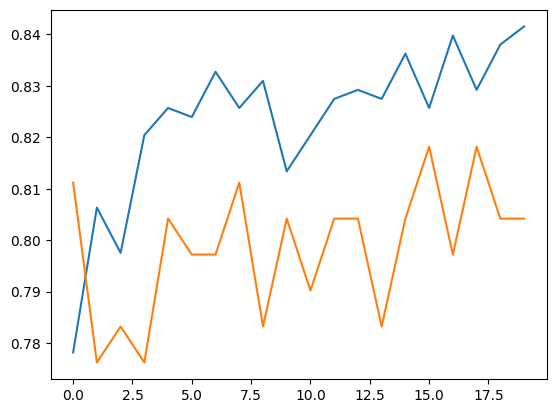

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras
from sklearn.metrics import classification_report,confusion_matrix



model = Sequential()
model.add(Dense(32,activation = 'leaky_relu',input_shape = (X_train.shape[1],)))

model.add(Dense(4,activation= 'leaky_relu'))
model.add(Dense(1,activation = 'sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.011)
model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=20)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

loss,accuracy= model.evaluate(X_test,y_test)
print(f'accuracy: {accuracy}' )



увеличим количество слоев

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.6856 - loss: 0.6075 - val_accuracy: 0.7832 - val_loss: 0.5000
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7822 - loss: 0.4620 - val_accuracy: 0.8042 - val_loss: 0.4544
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7966 - loss: 0.4251 - val_accuracy: 0.7692 - val_loss: 0.4969
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7978 - loss: 0.4309 - val_accuracy: 0.8182 - val_loss: 0.4427
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8109 - loss: 0.4052 - val_accuracy: 0.8112 - val_loss: 0.4750
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8091 - loss: 0.4042 - val_accuracy: 0.8462 - val_loss: 0.4296
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8327 - loss: 0.3965 - val_accuracy: 0.7972 - val_loss: 0.4693
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8387 - loss: 0.3640 - val_accuracy: 0.7762 - va

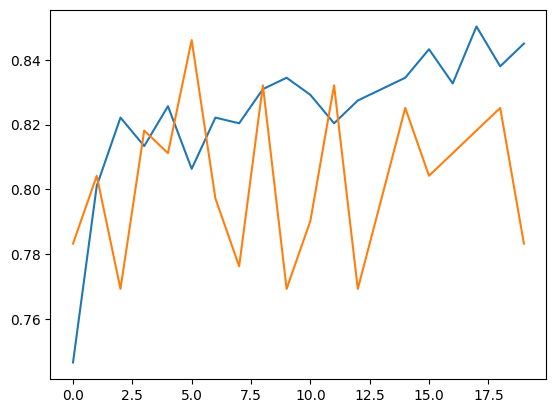

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras
from sklearn.metrics import classification_report,confusion_matrix



model = Sequential()
model.add(Dense(32,activation = 'leaky_relu',input_shape = (X_train.shape[1],)))
model.add(Dense(16,activation= 'leaky_relu'))
model.add(Dense(4,activation= 'leaky_relu'))
model.add(Dense(1,activation = 'sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.011)
model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

loss,accuracy= model.evaluate(X_test,y_test)
print(f'accuracy: {accuracy}' )


ещё сложнее

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7329 - loss: 0.5827 - val_accuracy: 0.7622 - val_loss: 0.5225
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7959 - loss: 0.4220 - val_accuracy: 0.7622 - val_loss: 0.4625
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8240 - loss: 0.3935 - val_accuracy: 0.7762 - val_loss: 0.4749
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8238 - loss: 0.3805 - val_accuracy: 0.7832 - val_loss: 0.4908
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8213 - loss: 0.3688 - val_accuracy: 0.7762 - val_loss: 0.4517
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8320 - loss: 0.3848 - val_accuracy: 0.7692 - val_loss: 0.4659
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8326 - loss: 0.3421 - val_accuracy: 0.8042 - val_loss: 0.4466
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8276 - loss: 0.3874 - val_accuracy: 0.7622 - val_loss

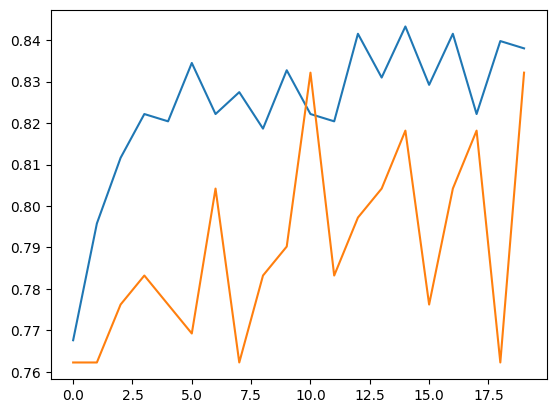

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras
from sklearn.metrics import classification_report,confusion_matrix



model = Sequential()
model.add(Dense(32,activation = 'leaky_relu',input_shape = (X_train.shape[1],)))
model.add(Dense(16,activation= 'leaky_relu'))
model.add(Dense(4,activation= 'leaky_relu'))
model.add(Dense(1,activation = 'sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.011)
model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

loss,accuracy= model.evaluate(X_test,y_test)
print(f'accuracy: {accuracy}' )


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6286 - loss: 0.6232 - val_accuracy: 0.7972 - val_loss: 0.5009
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8082 - loss: 0.4500 - val_accuracy: 0.8322 - val_loss: 0.4510
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8214 - loss: 0.4037 - val_accuracy: 0.8112 - val_loss: 0.4533
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8247 - loss: 0.4125 - val_accuracy: 0.7902 - val_loss: 0.4395
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8148 - loss: 0.3993 - val_accuracy: 0.8182 - val_loss: 0.4527
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8374 - loss: 0.3873 - val_accuracy: 0.7972 - val_loss: 0.5131
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8216 - loss: 0.3842 - val_accuracy: 0.8322 - val_loss: 0.4381
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8353 - loss: 0.3748 - val_accuracy: 0.7902 - val_loss

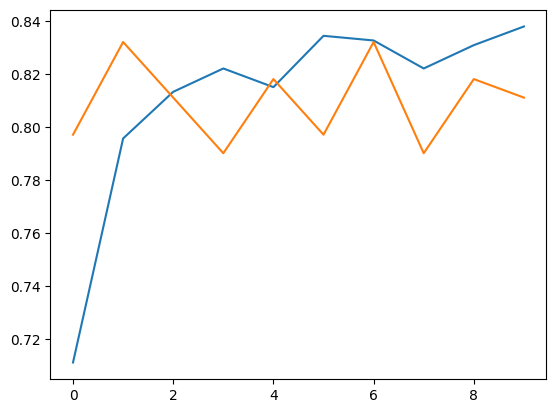

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras
from sklearn.metrics import classification_report,confusion_matrix



model = Sequential()
model.add(Dense(32,activation = 'leaky_relu',input_shape = (X_train.shape[1],)))
model.add(Dense(16,activation= 'leaky_relu'))
model.add(Dense(8,activation= 'leaky_relu'))
model.add(Dense(4,activation= 'leaky_relu'))
model.add(Dense(1,activation = 'sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.011)
model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

loss,accuracy= model.evaluate(X_test,y_test)
print(f'accuracy: {accuracy}' )


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6302 - loss: 0.6069 - val_accuracy: 0.7413 - val_loss: 0.5254
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7981 - loss: 0.4612 - val_accuracy: 0.7832 - val_loss: 0.4867
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8217 - loss: 0.4145 - val_accuracy: 0.7762 - val_loss: 0.4795
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7953 - loss: 0.4437 - val_accuracy: 0.7552 - val_loss: 0.5050
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8233 - loss: 0.3775 - val_accuracy: 0.7692 - val_loss: 0.4562
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8108 - loss: 0.3984 - val_accuracy: 0.7762 - val_loss: 0.4844
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8124 - loss: 0.4136 - val_accuracy: 0.7692 - val_loss: 0.5402
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8132 - loss: 0.3935 - val_accuracy: 0.7832 - val_loss

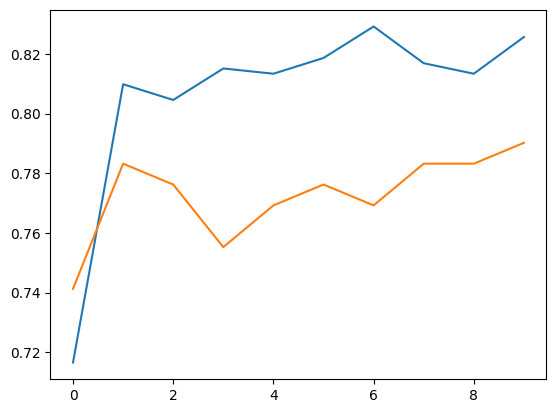

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras
from sklearn.metrics import classification_report,confusion_matrix



model = Sequential()
model.add(Dense(64,activation = 'leaky_relu',input_shape = (X_train.shape[1],)))
model.add(Dense(32,activation= 'leaky_relu'))
model.add(Dense(16,activation= 'leaky_relu'))
model.add(Dense(8,activation= 'leaky_relu'))
model.add(Dense(4,activation= 'leaky_relu'))
model.add(Dense(1,activation = 'sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.011)
model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

loss,accuracy= model.evaluate(X_test,y_test)
print(f'accuracy: {accuracy}' )


**Лучшая модель**

Лучше всего себя показали нейронные сети с accyracy 0.82

Сначала рассмотри confusion_matrix ,потом посчитаем терики на кросс валидации

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6528 - loss: 0.6316 - val_accuracy: 0.7972 - val_loss: 0.4928
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8103 - loss: 0.4306 - val_accuracy: 0.7762 - val_loss: 0.4903
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8069 - loss: 0.4211 - val_accuracy: 0.8042 - val_loss: 0.4736
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8292 - loss: 0.3830 - val_accuracy: 0.8042 - val_loss: 0.4640
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8455 - loss: 0.3910 - val_accuracy: 0.8252 - val_loss: 0.4596
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8257 - loss: 0.3869 - val_accuracy: 0.8182 - val_loss: 0.4655
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8298 - loss: 0.3798 - val_accuracy: 0.7832 - val_loss: 0.4766
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8346 - loss: 0.3951 - val_accuracy: 0.8112 - val_loss: 0.4741
Ep

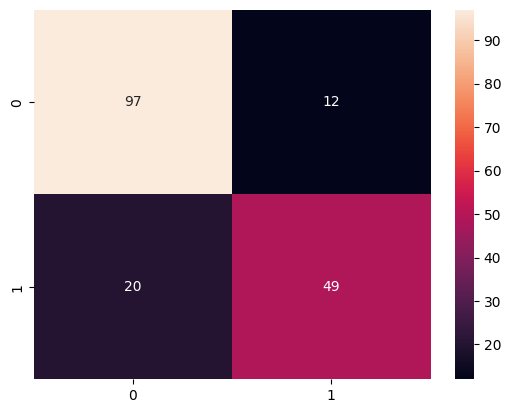

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

model = Sequential()
model.add(Dense(32,activation = 'leaky_relu',input_shape = (X_train.shape[1],)))
model.add(Dense(16,activation= 'leaky_relu'))
model.add(Dense(4,activation= 'leaky_relu'))
model.add(Dense(1,activation = 'sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.011)
model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=10)





loss,accuracy= model.evaluate(X_test,y_test)
print(f'accuracy: {accuracy}' )
y_pred  = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)
print(classification_report(y_test,y_pred))

# Кросс валидация

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop("Survived",axis =1)
Y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=33)
kf.split(X)

losses_test = []
losses_train = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]
    # На каждой итерации строим лин.регрессию на train
    model = Sequential()
    model.add(Dense(32,activation = 'leaky_relu',input_shape = (X_train.shape[1],)))
    model.add(Dense(16,activation= 'leaky_relu'))
    model.add(Dense(4,activation= 'leaky_relu'))
    model.add(Dense(1,activation = 'sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.011)
    model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])
    model.fit(X_train, Y_train, validation_split=0.2, epochs=10)
    # Замеряем качество модели(RMSE)
    loss,accuracy_test= model.evaluate(X_test,Y_test)
    loss,accuracy_train = model.evaluate(X_train,Y_train)
    losses_test.append(accuracy_test)
    losses_train.append(accuracy_train)
print("accuracy на test: ",np.mean(losses_test))
print("accuracy на train: ",np.mean(losses_train))


# ВЫВОД

Лучше всего себя показала модель нейронной сети с метриками accuracy: 0.82 ,precision: 0.82, recall: 0.8 .Также хотелось бы отметить ,что модель лучше прогнозирует кто погибнем ,чем тот ,кто выживет precision:0.83  ,recall: 0.89, f1-score: 0.86 для погибших против precision:0.80 ,recall: 0.71, f1-score: 0.75
у выживших.Это связано со скошенность распределения пассажиров в сторону погибших,что было видно на первом графике.